<a href="https://colab.research.google.com/github/PalomaABS/Prueba/blob/main/Modulo_2_Clases_2_3_Alumnos_Introduccio%CC%81n_al_desarrollo_de_la_gui%CC%81a_IA_generativa_y_herramientas_de_soporte_V2_Langfuse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grupos de trabajo

## Grupo 1

* Yamur Aliquintui
* Paulo Araya
* Víctor Vásquez
* Luis Lopez

## Grupo 2

* Matías Mella
* David Lugo
* Jose Arandia
* Javier Araya

## Grupo 3

* Pablo Lastra Bachmann
* Oscar Rivera
* Maximiliano González
* Paloma Barahona

## Grupo 4

* Hardy Providell
* Carlos Castro
* David Peñaloza
* Christian Orquera
* Agustín Mella

## Grupo 5

* Matias Gutierrez
* Pablo Picunche
* Tania Lopez castro
* Camila Contreras
* Francisca Arauco

## Grupo 6

* Miguel Ceron
* Roberto González De La Cruz
* Rodrigo Díaz
* Gustavo Chamorro
* Eduardo Droguett


## ¿Qué es una API?
Una API (Interfaz de Programación de Aplicaciones) es un conjunto de funciones y definiciones que permiten que diferentes aplicaciones se comuniquen entre sí. Las APIs actúan como intermediarios que permiten que un software solicite y reciba servicios de otro software, facilitando la integración y el intercambio de datos entre sistemas.

Existen varios tipos de APIs, como las API web, que utilizan protocolos HTTP/HTTPS, y las API RESTful, que siguen principios de REST para la gestión de recursos a través de operaciones CRUD (Crear, Leer, Actualizar, Eliminar).

## API Rest de OpenAI
OpenAI, así como Google, Anthropic y otros proveedores de modelos de lenguaje, ofrece una API para interactuar con sus modelos y otras funcionalidades.

https://platform.openai.com/docs/api-reference/introduction

A continuación vamos a hacer nuestra primera llamada a la API de OpenAI.

Primero, cargamos las credenciales desde los secretos de colab y generamos un objeto openai (que usará esas credenciales)

In [ ]:
#!pip install openai

In [ ]:
from google.colab import userdata
from openai import OpenAI
import json
import os

# Asegúrate de almacenar tu clave de API en las variables de entorno
openai_api_key = userdata.get('OPENAI_API_KEY')
os.environ['OPENAI_API_KEY'] = openai_api_key

openai = OpenAI()

In [ ]:
response = openai.chat.completions.create(
    model="gpt-4.1",
    messages=[
        {"role": "system", "content": "Eres un instructor del curso de IA Generativa y debes responder consultas de tus alumnos"},
        {"role": "user", "content": "qué es un modelo de lenguaje?"}
    ],
    temperature = 0,
)

print(response)
print(json.dumps(response.to_dict(), indent=2))

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [ ]:
# Imprimir la respuesta final
message_content = response.choices[0].message.content
print(message_content)

Un modelo de lenguaje es un tipo de modelo de inteligencia artificial diseñado para comprender, generar y manipular texto en lenguaje humano. Estos modelos son entrenados en grandes cantidades de datos textuales para aprender patrones, estructuras gramaticales, significados de palabras y contextos. Su objetivo es predecir la probabilidad de una secuencia de palabras, lo que les permite realizar tareas como completar frases, traducir texto, responder preguntas, resumir documentos, y más.

Existen diferentes tipos de modelos de lenguaje, desde los más simples, como los modelos n-gramas, hasta los más avanzados, como los modelos basados en redes neuronales profundas, incluyendo los modelos de transformadores como GPT (Generative Pre-trained Transformer) y BERT (Bidirectional Encoder Representations from Transformers). Estos modelos han revolucionado el procesamiento del lenguaje natural (NLP) debido a su capacidad para generar texto coherente y relevante en una variedad de contextos.


##Componentes Clave de la Llamada:
Los parámetros más comúnmente utilizados son:
- model: Especifica qué modelo de OpenAI se utilizará para generar la respuesta (ej. "gpt-4o", "gpt-3.5-turbo"). La elección del modelo afecta las capacidades, la calidad de la respuesta y el costo. OpenAI ofrece una gama de modelos, desde los más potentes y recientes hasta versiones más rápidas y económicas.
- messages: Es una lista de objetos de mensaje que representan el historial de la conversación hasta el momento. Cada objeto de mensaje tiene dos propiedades principales :
-role: Indica quién dijo el mensaje. Los roles comunes son:
 - "system": Proporciona instrucciones o contexto de alto nivel al modelo sobre cómo debe comportarse o qué personalidad debe adoptar. Suele ser el primer mensaje en la lista.
 - "user": Representa las entradas o preguntas del usuario final.
 - "assistant": Representa las respuestas anteriores del modelo. Incluir estas respuestas en el historial permite mantener conversaciones coherentes.
 - "tool": En estos mensajes colocaremos las respuestas de las ejecuciones de herramientas que el modelo nos haya pedido.
-temperature: Controla la aleatoriedad de la salida del modelo. Es un valor entre 0 y 1. Valores más bajos (ej. 0 o 0.2) hacen que la salida sea más determinista y enfocada, ideal para tareas que requieren respuestas factuales o predecibles. Valores más altos (ej. 0.8 o 1.0) hacen que la salida sea más creativa y diversa, útil para la generación de historias o brainstorming.
-response_format: Permite especificar el formato de la salida. Un uso común es {"type": "json_object"} para instruir al modelo a devolver una respuesta en formato JSON válido. Esto es especialmente útil cuando se necesita una salida estructurada que pueda ser fácilmente analizada por la aplicación.
-tools y tool_choice: Estos parámetros se utilizan para habilitar y controlar la funcionalidad de "Function Calling" o "Tool Use", permitiendo al modelo interactuar con herramientas externas definidas por el desarrollador o herramientas incorporadas por OpenAI (como búsqueda web o búsqueda de archivos).

La referencia completa a los parámetros y respuestas de esta API se encuentra en:

https://platform.openai.com/docs/api-reference/chat



##Obteniendo Respuestas Estructuradas: response_format y json_schema
Una de las necesidades comunes al interactuar con LLMs mediante API es obtener respuestas en un formato estructurado que pueda ser fácilmente procesado por una aplicación. Si bien los LLMs son excelentes generando texto en lenguaje natural, para la integración programática, un formato como JSON es a menudo preferible. OpenAI facilita esto a través del parámetro response_format y, de manera más robusta, con la validación contra un json_schema cuando se utiliza "Function Calling" o el modo JSON estructurado.
response_format = { "type": "json_object" }:

-Propósito: Este parámetro, cuando se incluye en una solicitud a chat/completions, instruye al modelo para que garantice que su salida sea un objeto JSON sintácticamente válido.

-Funcionamiento: El modelo intentará generar una cadena que se pueda analizar como JSON. Es crucial acompañar esto con una instrucción clara en el prompt (generalmente en el mensaje del sistema o del usuario) pidiéndole al modelo que responda en formato JSON. De hecho, la API de OpenAI puede arrojar un error si la palabra "JSON" no aparece en el contexto del prompt cuando se usa este modo, para evitar que el modelo genere un flujo interminable de espacios en blanco.

Las opciones más habituales en Python para especificar el formato son definir directamente el formato JSON o bien especificar una clase de tipo **Pydantic** con la estructura deseada.

In [ ]:
response = openai.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "Eres un instructor del curso de IA Generativa y debes responder consultas de tus alumnos. Responde con un json"},
        {"role": "user", "content": "nombra 3 modelos de lenguaje y para cada uno dame una descripción y la compañía que lo creó"}
    ],
    temperature = 0,
    response_format = { "type": "json_object" }
)
message_content = response.choices[0].message.content
print(message_content)


{
  "modelos": [
    {
      "nombre": "GPT-3",
      "descripción": "GPT-3, o Generative Pre-trained Transformer 3, es un modelo de lenguaje desarrollado por OpenAI. Es conocido por su capacidad para generar texto coherente y relevante en una amplia variedad de contextos, gracias a su arquitectura de transformador y su entrenamiento en un gran corpus de datos de texto.",
      "compañía": "OpenAI"
    },
    {
      "nombre": "BERT",
      "descripción": "BERT, que significa Bidirectional Encoder Representations from Transformers, es un modelo de lenguaje desarrollado por Google. Se centra en el preentrenamiento bidireccional, lo que le permite comprender el contexto de una palabra en una oración analizando tanto las palabras que la preceden como las que la siguen.",
      "compañía": "Google"
    },
    {
      "nombre": "T5",
      "descripción": "T5, o Text-to-Text Transfer Transformer, es un modelo de lenguaje desarrollado por Google Research. Este modelo trata todas las tareas de

In [ ]:
# Imprimir la respuesta final
first_choice_message = response.choices[0].message
message_content = first_choice_message.content
print(message_content)

{
  "modelos": [
    {
      "nombre": "GPT-3",
      "descripción": "GPT-3, o Generative Pre-trained Transformer 3, es un modelo de lenguaje desarrollado por OpenAI. Es conocido por su capacidad para generar texto coherente y relevante en una amplia variedad de contextos, gracias a su arquitectura de transformador y su entrenamiento en un gran corpus de datos de texto.",
      "compañía": "OpenAI"
    },
    {
      "nombre": "BERT",
      "descripción": "BERT, que significa Bidirectional Encoder Representations from Transformers, es un modelo de lenguaje desarrollado por Google. Se centra en el preentrenamiento bidireccional, lo que le permite comprender el contexto de una palabra en una oración analizando tanto las palabras que la preceden como las que la siguen.",
      "compañía": "Google"
    },
    {
      "nombre": "T5",
      "descripción": "T5, o Text-to-Text Transfer Transformer, es un modelo de lenguaje desarrollado por Google Research. Este modelo trata todas las tareas de

In [ ]:
response = openai.chat.completions.create(
    model="gpt-4o-2024-08-06",
    messages=[
        {
            "role": "system",
            "content": (
                "Eres un instructor del curso de IA Generativa y debes responder consultas de tus alumnos. "
                "Responde con un JSON que incluya los siguientes campos para cada modelo de lenguaje: "
                "nombre, descripcion, compania, ano_lanzamiento, arquitectura, casos_uso, enlace_oficial y tipo_modelo."
            )
        },
        {
            "role": "user",
            "content": "Nombra 3 modelos de lenguaje y proporciona los detalles mencionados."
        }
    ],
    temperature=0,
    response_format={
        "type": "json_schema",
        "json_schema": {
            "name": "language_models_info",
            "description": "Información estructurada sobre modelos de lenguaje.",
            "strict": True,
            "schema": {
                "type": "object",
                "properties": {
                    "models": {
                        "type": "array",
                        "description": "Lista de modelos de lenguaje con sus respectivos detalles.",
                        "items": {
                            "type": "object",
                            "properties": {
                                "nombre": {
                                    "type": "string",
                                    "description": "Nombre del modelo de lenguaje."
                                },
                                "descripcion": {
                                    "type": "string",
                                    "description": "Breve descripción del modelo y sus capacidades."
                                },
                                "compania": {
                                    "type": "string",
                                    "description": "Compañía u organización que desarrolló el modelo."
                                },
                                "ano_lanzamiento": {
                                    "type": "integer",
                                    "description": "Año en que se lanzó el modelo."
                                },
                                "arquitectura": {
                                    "type": "string",
                                    "description": "Arquitectura subyacente del modelo (por ejemplo, 'Transformer')."
                                },
                                "casos_uso": {
                                    "type": "array",
                                    "description": "Casos de uso típicos del modelo.",
                                    "items": {"type": "string"},
                                    "minItems": 1
                                },
                                "enlace_oficial": {
                                    "type": "string",
                                    "description": "URL del sitio oficial o documentación del modelo."
                                },
                                "tipo_modelo": {
                                    "type": "string",
                                    "description": "Clasificación general del modelo.",
                                    "enum": ["preentrenado", "ajustado", "especializado", "experimental"]
                                }
                            },
                            "required": [
                                "nombre",
                                "descripcion",
                                "compania",
                                "ano_lanzamiento",
                                "arquitectura",
                                "casos_uso",
                                "enlace_oficial",
                                "tipo_modelo"
                            ],
                            "additionalProperties": False
                        }
                    }
                },
                "required": ["models"],
                "additionalProperties": False
            }
        }
    }
)

# Imprimir la respuesta final
first_choice_message = response.choices[0].message
message_content = first_choice_message.content

# Convert string to Python dictionary
parsed_json = json.loads(message_content)

# Print with indentation
print(json.dumps(parsed_json, indent=4, ensure_ascii=False))



{
    "models": [
        {
            "nombre": "GPT-3",
            "descripcion": "Un modelo de lenguaje avanzado capaz de generar texto coherente y realizar tareas de procesamiento de lenguaje natural.",
            "compania": "OpenAI",
            "ano_lanzamiento": 2020,
            "arquitectura": "Transformer",
            "casos_uso": [
                "Generación de texto",
                "Asistentes virtuales",
                "Traducción automática",
                "Análisis de sentimientos"
            ],
            "enlace_oficial": "https://openai.com/research/gpt-3/",
            "tipo_modelo": "preentrenado"
        },
        {
            "nombre": "BERT",
            "descripcion": "Modelo de lenguaje bidireccional que se utiliza para tareas de comprensión del lenguaje natural.",
            "compania": "Google",
            "ano_lanzamiento": 2018,
            "arquitectura": "Transformer",
            "casos_uso": [
                "Análisis de sentimientos",

Para un detalle de las principales APIs disponibles, consultar en:

<table>
  <tr>
    <th>Plataforma</th>
    <th>Enlace a la Documentación de la API</th>
  </tr>
  <tr>
    <td>OpenAI</td>
    <td><a href="https://platform.openai.com/docs/api-reference/introduction">OpenAI API Documentation</a></td>
  </tr>
  <tr>
    <td>Google Gemini</td>
    <td><a href="https://ai.google.dev/gemini-api/docs?hl=es-419">Google Generative Language API Documentation</a></td>
  </tr>
  <tr>
    <td>Anthropic Claude</td>
    <td><a href="https://docs.anthropic.com/en/docs/intro-to-claude">Anthropic API Documentation</a></td>
  </tr>
</table>


# Ejercicio grupal 1

Para este ejercicio nos dividiremos en grupos. Tendremos 20 minutos para resolverlo y luego 10 para aclarar dudas entre todos los grupos.

Llamar al api de OpenAI con un prompt y dos imágenes. Hacer que el modelo conteste con 3 características sobre cada imagen en cuestión, en formato JSON conteniendo el nombre de la imagen, el nombre de la característica y una descripción de la misma.

https://platform.openai.com/docs/guides/vision/uploading-base-64-encoded-images

In [ ]:
import openai
import base64
import json

# Función para convertir imagen a base64
def image_to_base64(image_path):
    with open(image_path, "rb") as f:
        return base64.b64encode(f.read()).decode("utf-8")

# Rutas de las imágenes
image_paths = ["/content/golden.jpg"]
image_names = [path.split("/")[-1] for path in image_paths]
images_b64 = [image_to_base64(path) for path in image_paths]

# Construcción del mensaje
prompt = (
    "Describe 3 características visuales distintivas para cada imagen. "
    "Devuelve un JSON con este formato:\n"
    "[\n"
    "  {\n"
    "    \"nombre_imagen\": \"nombre.jpg\",\n"
    "    \"caracteristicas\": [\n"
    "      {\"nombre\": \"Nombre de la característica\", \"descripcion\": \"Descripción\"},\n"
    "      ...\n"
    "    ]\n"
    "  },\n"
    "  ...\n"
    "]"
)

# Estructura de contenido para el mensaje
inputs = [
    {"type": "text", "text": prompt}
]

# Agregar imágenes al contenido
for name, img_b64 in zip(image_names, images_b64):
    inputs.append({
        "type": "image_url",
        "image_url": {
            "url": f"data:image/jpeg;base64,{img_b64}"
        }
    })

# Llamar a la API
response = openai.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "Eres un modelo que analiza imágenes y responde en formato JSON."},
        {"role": "user", "content": inputs}
    ],
    temperature=1,
    max_tokens=1000,
)

# Imprimir respuesta
print(response.choices[0].message.content)

```json
[
  {
    "nombre_imagen": "golden_retriever.jpg",
    "caracteristicas": [
      {
        "nombre": "Pelaje dorado",
        "descripcion": "El perro tiene un pelaje largo y de color dorado que es característico de la raza."
      },
      {
        "nombre": "Expresión amigable",
        "descripcion": "El perro muestra una expresión facial amigable con la boca abierta en lo que parece una sonrisa."
      },
      {
        "nombre": "Entorno de césped",
        "descripcion": "El perro está recostado sobre un césped verde, lo que sugiere un entorno exterior natural."
      }
    ]
  }
]
```


## ¿Qué es un Framework?
Un framework es un conjunto de herramientas, bibliotecas y convenciones de diseño que proporcionan una estructura predefinida para el desarrollo de software. Los frameworks ayudan a los desarrolladores a crear aplicaciones más rápidamente al reutilizar componentes y seguir patrones de diseño establecidos. Estos marcos son esenciales para mantener la consistencia y la eficiencia en proyectos de desarrollo complejos.

### Ventajas de los Frameworks
1. Eficiencia: Proporcionan una estructura organizada, lo que acelera el desarrollo y facilita el mantenimiento del código.
2. Reutilización de Código: Permiten reutilizar componentes y módulos, lo que ahorra tiempo y esfuerzo.
3. Consistencia: Promueven prácticas de codificación estandarizadas, lo que resulta en un código más legible y mantenible.
4. Seguridad: Muchos frameworks incluyen características de seguridad integradas para proteger contra vulnerabilidades comunes.
5. Documentación y Soporte: Suelen venir acompañados de una extensa documentación y recursos de soporte, incluyendo tutoriales y ejemplos de código.

### Desventajas de los Frameworks
1. Curva de Aprendizaje: Pueden ser complejos y requerir tiempo para aprender y dominar.
2. Rigidez: La estructura predefinida puede limitar la flexibilidad y creatividad del desarrollador.
3. Sobrecarga de Funciones: Pueden incluir muchas características que no se necesitan, lo que puede hacerlos más pesados.
4. Dependencia: Usar un framework específico puede hacer que el proyecto dependa de su mantenimiento y actualizaciones futuras.

# LangChain: Un Buen Framework para Aplicaciones de IA Generativa
LangChain es el framework más utilizado para simplificar la construcción de aplicaciones de inteligencia artificial generativa, particularmente aquellas que utilizan modelos de lenguaje avanzados como GPT-4. A continuación, se detallan algunas razones por las que LangChain es una excelente opción para desarrolladores de IA:
1. Integración Sencilla: LangChain facilita la integración de modelos de lenguaje en aplicaciones, proporcionando interfaces y herramientas que simplifican el proceso.
2. Modularidad: Permite a los desarrolladores utilizar componentes modulares que pueden ser fácilmente combinados y reutilizados en diferentes partes de la aplicación.
3. Optimización de Procesos: Incluye funciones específicas para optimizar el rendimiento y la eficiencia de los modelos de lenguaje, lo que es crucial para aplicaciones en tiempo real.
4. Documentación Extensa: Ofrece una amplia documentación y ejemplos prácticos que ayudan a los desarrolladores a implementar soluciones de IA rápidamente.
 * Sitio principal: https://www.langchain.com/
 * Introducción a Langchain: https://python.langchain.com/v0.2/docs/introduction/
 * API Reference: https://api.python.langchain.com/en/latest/langchain_api_reference.html
 *
5. Soporte Activo: La comunidad y los desarrolladores de LangChain proporcionan un soporte continuo, asegurando que el framework se mantenga actualizado con las últimas tecnologías y mejores prácticas en IA (Cursos Online) (Aprende Informática).
LangChain destaca como un framework robusto y eficiente, ideal para aprovechar el poder de los modelos de lenguaje de manera efectiva y sin complicaciones innecesarias.


Veamos algunas de sus características principales:

https://python.langchain.com/v0.2/docs/introduction/

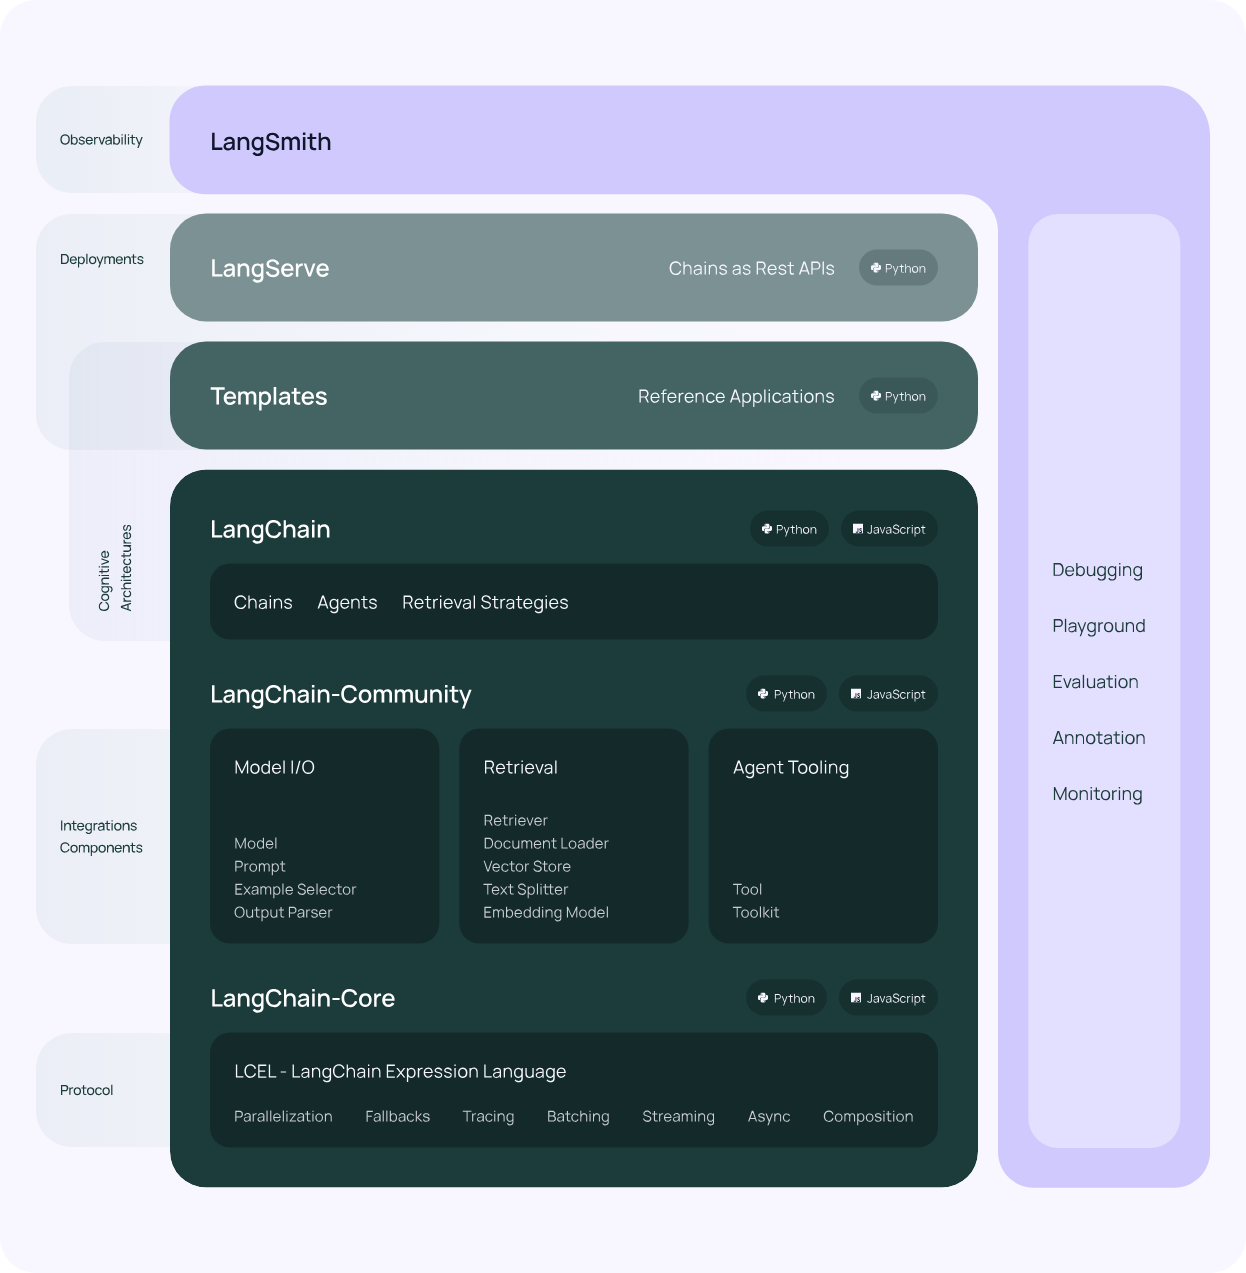

## Usando Langchain

Ahora vamos a ejecutar la misma llamada a Open AI pero usando Langchain


In [ ]:
!pip install langchain
!pip install langchain-openai
!pip install langchain_core
!pip install langfuse

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 22.1 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.44
    Uninstalling langsmith-0.3.44:
      Successfully uninstalled langsmith-0.3.44
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.63
    Uninstalling langchain-core-0.3.63:
      Successfully uninstalled langchain-core-0.3.63
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.5/292.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 13.3 MB/s eta 0:00:00


In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage
from pprint import pprint

model = ChatOpenAI(model="gpt-4o-mini")
message = model.invoke(
    [SystemMessage(content="Eres un instructor del curso de IA Generativa y debes responder consultas de tus alumnos"),
     HumanMessage(content="qué es un modelo de lenguaje?")])

print(message)
print("\n\nSolo content:")
pprint(message.content)


content='Un modelo de lenguaje es un tipo de algoritmo de inteligencia artificial que se utiliza para comprender y generar texto. Estos modelos son entrenados en grandes cantidades de datos textuales y son capaces de predecir la próxima palabra en una oración, basándose en las palabras que las preceden. Utilizan técnicas de procesamiento del lenguaje natural (NLP) para analizar y generar lenguaje humano.\n\nPor ejemplo, un modelo de lenguaje puede ser usado para tareas como completar oraciones, traducir texto, responder preguntas, resumir información, entre otros. Los modelos más avanzados, como GPT-3 y sus sucesores, son capaces de mantener conversaciones coherentes y realizar tareas complejas gracias a su entrenamiento en una amplia variedad de temas y estilos de escritura.\n\nEn resumen, un modelo de lenguaje actúa como un "cerebro" que entiende y produce texto, facilitando la interacción entre humanos y máquinas. Si tienes más preguntas sobre su funcionamiento o aplicaciones especí

# Introducción a LangFuse
LangSmith es una plataforma diseñada para facilitar la depuración, prueba, evaluación y monitoreo de aplicaciones y agentes basados en modelos de lenguaje (LLM). Aunque LangChain facilita la creación rápida de prototipos de aplicaciones LLM, llevar estas aplicaciones a producción puede ser complicado. LangFuse aborda esta dificultad proporcionando herramientas robustas para mejorar continuamente la calidad de los productos.

Una alternativa que existe dentro del ecosistema LangChain es LangSmith. Sin embargo, las ventajas de LangFuse son que es de código abierto y que puede usarse tanto como servicio en la nube como desplegándose en forma local en un contenedor.

Esto evita cualquier preocupación relacionada con la seguridad y privacidad de los datos, además de los costos asociados a LangSmith.

## ¿Cuándo es útil LangFuse?
- Depurar rápidamente una nueva cadena, agente o conjunto de herramientas.
- Crear y gestionar conjuntos de datos para ajuste fino, pocas tomas (few-shot prompting) y evaluación.
- Ejecutar pruebas de regresión para desarrollar con confianza.
- Capturar análisis de producción para obtener información sobre el producto y realizar mejoras continuas.

## Prerrequisitos
- Crear una cuenta en LangFuse y obtener una clave API.





In [ ]:
from google.colab import userdata
from openai import OpenAI
import json
import os

LANGFUSE_PUBLIC_KEY = userdata.get('LANGFUSE_PUBLIC_KEY')
LANGFUSE_SECRET_KEY = userdata.get('LANGFUSE_SECRET_KEY')
os.environ["LANGFUSE_PUBLIC_KEY"] = LANGFUSE_PUBLIC_KEY
os.environ["LANGFUSE_SECRET_KEY"] = LANGFUSE_SECRET_KEY
os.environ["LANGFUSE_HOST"] = "https://cloud.langfuse.com"
os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")



In [ ]:
from langfuse.langchain import CallbackHandler
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

# Initialize LangFuse CallbackHandler
langfuse_handler = CallbackHandler()

# Initialize ChatOpenAI model
model = ChatOpenAI(model="gpt-4o-mini")

# Invoke the model with LangFuse tracing
response = model.invoke(
    [
        SystemMessage(content="Eres un instructor del curso de IA Generativa y debes responder consultas de tus alumnos"),
        HumanMessage(content="¿Qué es un modelo de lenguaje?")
    ],
    config={"callbacks": [langfuse_handler]}
)

pprint(response.content)

('Un modelo de lenguaje es un tipo de modelo de inteligencia artificial que se '
 'utiliza para comprender y generar texto de manera coherente en un lenguaje '
 'humano. Estos modelos se entrenan utilizando grandes volúmenes de datos '
 'textuales y aprenden a predecir la probabilidad de ocurrencia de una palabra '
 'o secuencia de palabras en función del contexto que las rodea.\n'
 '\n'
 'Los modelos de lenguaje pueden realizar diversas tareas, como:\n'
 '\n'
 '1. **Generación de texto**: Pueden crear contenido original, como artículos, '
 'cuentos o diálogos.\n'
 '2. **Traducción automática**: Proporcionan traducciones de texto de un '
 'idioma a otro.\n'
 '3. **Respuestas a preguntas**: Pueden responder preguntas basándose en el '
 'contenido que han aprendido.\n'
 '4. **Análisis de sentimiento**: Ayudan a determinar la emoción o la opinión '
 'expresada en un texto.\n'
 '5. **Completa oraciones**: Pueden sugerir continuaciones para frase o '
 'párrafos.\n'
 '\n'
 'Existen diferente

# Chat Models vs. Large Language Models (LLMs)
## Concepto General:
1. Modelos de Lenguaje Grande (LLMs): Los LLMs son modelos de inteligencia artificial diseñados para comprender y generar texto humano. Están entrenados con enormes cantidades de datos textuales y pueden realizar una amplia gama de tareas como redacción, resumen, traducción y generación de código. Su enfoque principal es generar texto coherente y contextualmente relevante a partir de una entrada dada, sin una especialización en la interacción continua.

2. Modelos de Chat: Los modelos de chat son una subcategoría de LLMs optimizados específicamente para tareas conversacionales. Estos modelos están entrenados para simular interacciones humanas en formato de chat, enfocándose en generar respuestas que no solo sean correctas, sino también oportunas y conversacionales.

Originalmente OpenAI ofrecía un modelo LLM y otro modelo de tipo Chat, pero desde hace un tiempo solo le dan mantenimiento al segundo: https://platform.openai.com/docs/guides/text-generation/chat-completions-vs-completions




# Prompt Templates en LangChain

**Concepto**: Los 'prompt templates' (plantillas de prompts) en LangChain son estructuras predefinidas que se utilizan para estandarizar las solicitudes enviadas a los LLMs. Estas plantillas ayudan a asegurar que las entradas a los modelos sean coherentes y efectivas, mejorando la calidad de las respuestas generadas.

https://python.langchain.com/v0.2/docs/concepts/#prompt-templates

**Importancia**: Las plantillas de prompts son importantes porque ayudan a mantener consistencia en cómo se formulan las solicitudes a los LLMs. Esto es esencial para obtener respuestas precisas y relevantes, especialmente cuando se manejan grandes volúmenes de datos o se integran múltiples componentes en una aplicación. Las plantillas permiten generar prompts dinámicamente al llenar variables de la plantilla con valores específicos en tiempo de ejecución, en lugar de tener que estar concatenando strings para generar los prompts cada vez.

**Uso**: A continuación, se muestra cómo definir y usar una plantilla de prompt en LangChain, y cómo integrarla en una cadena.

In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain


# Crear una plantilla de prompt
prompt_template = PromptTemplate(
    template="Como un asistente de IA, responderás preguntas de acuerdo con el siguiente contexto: \n'''{context}'''. \nPregunta: '''{question}'''",
    input_variables=['context', 'question']
)

# Ejemplo de uso del template
pregunta = '¿Cuáles fueron las acciones definidas para tomar? Enumera cada una en forma separada, describiendo la acción y qué persona quedó como responsable.'
# Leer la minuta desde el archivo
with open('Minuta reunion.txt', 'r', encoding='utf-8') as file:
    # Leer el contenido del archivo
    minuta = file.read()

prompt = prompt_template.format(context=minuta, question=pregunta)
print(prompt)



Como un asistente de IA, responderás preguntas de acuerdo con el siguiente contexto: 
'''Fecha: 6 de noviembre de 2024
Hora: 10:00 AM - 11:00 AM
Lugar: Sala de Conferencias, Oficina Principal
Asistentes:

	•	Juan Pérez (Desarrollador)
	•	Ana Gómez (Diseñadora UX)
	•	Luis Torres (Gerente de Proyecto)

Agenda:

	1.	Revisión del estado actual del proyecto de la app de ecommerce.
	2.	Discusión sobre los próximos pasos y asignación de tareas.
	3.	Resolución de problemas y obstáculos.

1. Revisión del estado actual:

	•	Juan: Informó que se ha completado el desarrollo del módulo de autenticación de usuarios. Está funcionando correctamente en el entorno de pruebas.
	•	Ana: Mencionó que la interfaz de usuario para la página de inicio ha sido diseñada y enviada para revisión. La retroalimentación inicial ha sido positiva.
	•	Luis: Confirmó que el sistema de gestión de productos está en desarrollo y se espera que esté listo para pruebas en dos semanas.

2. Próximos pasos:

	•	Juan: Continuará tr

In [ ]:
from pydantic import BaseModel, Field
from typing import List
import json

class EntradaMinuta(BaseModel):
    tema: str = Field(description="La descripción del tema")
    persona: str = Field(description="La persona responsable")


class Minuta(BaseModel):
    entradas: List[EntradaMinuta] = Field(description="Lista de entradas individuales de la minuta")


# Ejemplo de integración con LangChain
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")

# Aquí tu `prompt_template` ya debe estar definido

# Crear una cadena con output estructurado en la clase padre
chain = prompt_template | llm.with_structured_output(Minuta)

response = chain.invoke({'context': minuta, 'question': pregunta})

print(response)
print(json.dumps(response.model_dump(), indent=4, ensure_ascii=False))

entradas=[EntradaMinuta(tema='Integración del sistema de pago y resolución de la API de envío', persona='Juan Pérez'), EntradaMinuta(tema='Ajuste de la interfaz de usuario y diseño del carrito de compras', persona='Ana Gómez'), EntradaMinuta(tema='Investigación sobre los requisitos de accesibilidad y coordinación de la reunión con marketing', persona='Luis Torres')]
{
    "entradas": [
        {
            "tema": "Integración del sistema de pago y resolución de la API de envío",
            "persona": "Juan Pérez"
        },
        {
            "tema": "Ajuste de la interfaz de usuario y diseño del carrito de compras",
            "persona": "Ana Gómez"
        },
        {
            "tema": "Investigación sobre los requisitos de accesibilidad y coordinación de la reunión con marketing",
            "persona": "Luis Torres"
        }
    ]
}


In [ ]:
pregunta = "¿Cuáles fueron los temas discutidos durante la reunión? Describe brevemente el tema y qué persona fue la primera en mencionarlo."
response = chain.invoke({'context': minuta, 'question': pregunta})

print(response)
print(json.dumps(response.model_dump(), indent=4, ensure_ascii=False))

entradas=[EntradaMinuta(tema='Revisión del estado actual del proyecto de la app de ecommerce', persona='Juan Pérez'), EntradaMinuta(tema='Discusión sobre los próximos pasos y asignación de tareas', persona='Juan Pérez'), EntradaMinuta(tema='Resolución de problemas y obstáculos', persona='Juan Pérez')]
{
    "entradas": [
        {
            "tema": "Revisión del estado actual del proyecto de la app de ecommerce",
            "persona": "Juan Pérez"
        },
        {
            "tema": "Discusión sobre los próximos pasos y asignación de tareas",
            "persona": "Juan Pérez"
        },
        {
            "tema": "Resolución de problemas y obstáculos",
            "persona": "Juan Pérez"
        }
    ]
}


#Ejercicio grupal 2

Para este ejercicio tendremos 30 minutos para su resolución y luego 10 para aclarar dudas entre todos los grupos.

Crearemos una rutina que lea preguntas, desde un archivo Excel y las deje contestadas en el mismo archivo. Para ello deberán crear un Excel que contengan 10 preguntas como mínimo (pueden crearlas con ChatGPT), subirlo al espacio de archivos de Google Colab y leerlo con la bilioteca pandas.

Deben cumplir con los siguientes puntos:

*   Utilizar langchain para llamar a OpenAI
*   Usar Prompt Templates para no repetir las instrucciones
*   Revisar en LangsFuse los llamados hechos y las respuestas


A continuación un bloque de código de ayuda, que lee un excel, le cambia la celda A1 y lo graba con otro nombre:

In [ ]:
import pandas as pd

# Abrir el archivo
file_path = './Preguntas y respuestas.xlsx'
df = pd.read_excel(file_path, header=None)

df.head()


,0,1
0,PREGUNTA,RESPUESTA
1,¿Cuál es la identidad secreta de Batman?,NaN
2,¿Cómo obtuvo Superman sus poderes?,NaN
3,¿Cuál es el verdadero nombre de Wonder Woman?,NaN
4,¿En qué ciudad opera Green Lantern principalme...,NaN


In [ ]:

# Sobreescribir el valor de la celda A1
df.iloc[0, 0] = "SUPER PREGUNTA"

# Grabar el archivo
output_file_path = './Preguntas con respuestas.xlsx'
df.to_excel(output_file_path, index=False)

df.head()

,0,1
0,SUPER PREGUNTA,RESPUESTA
1,¿Cuál es la identidad secreta de Batman?,NaN
2,¿Cómo obtuvo Superman sus poderes?,NaN
3,¿Cuál es el verdadero nombre de Wonder Woman?,NaN
4,¿En qué ciudad opera Green Lantern principalme...,NaN


In [ ]:
!pip install pandas langchain
!pip install -U langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 25.9 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.44
    Uninstalling langsmith-0.3.44:
      Successfully uninstalled langsmith-0.3.44
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.63
    Uninstalling langchain-core-0.3.63:
      Successfully uninstalled langchain-core-0.3.63


In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain
import pandas as pd

# Crear una plantilla de prompt
prompt_template = PromptTemplate(
    template="Como un asistente de IA, responderás preguntas de acuerdo con el siguiente contexto: \n'''{context}'''. \nPregunta: '''{question}'''",
    input_variables=['context', 'question']
)

# Leer el archivo Excel (asumiendo que solo necesitas una hoja)
df = pd.read_excel('Preguntas con respuestas.xlsx')
# Seleccionar la segunda columna (índice 1 en Python)
pregunta = df.iloc[0, 0]

# Unir todas las celdas de esa columna en un solo string como contexto
contexto = '\n'.join(df.astype(str).apply(lambda row: ' - '.join(row), axis=1))

# Formatear el prompt
prompt = prompt_template.format(context=contexto, question=pregunta)

# Mostrar el resultado
print(prompt)

Como un asistente de IA, responderás preguntas de acuerdo con el siguiente contexto: 
'''SUPER PREGUNTA - RESPUESTA
¿Cuál es la identidad secreta de Batman? - nan
¿Cómo obtuvo Superman sus poderes? - nan
¿Cuál es el verdadero nombre de Wonder Woman? - nan
¿En qué ciudad opera Green Lantern principalmente? - nan
¿Qué villano de DC es conocido como el "Príncipe Payaso del Crimen"? - nan
¿Cuál es el nombre del planeta natal de Superman? - nan
¿Qué miembro de la Liga de la Justicia es el rey de Atlantis? - nan
¿Quién es el velocista conocido como The Flash? - nan
¿Qué superheroína de DC es conocida por su lazo de la verdad? - nan
¿Cuál es el nombre del archienemigo de Batman que es un maestro del enigma? - nan'''. 
Pregunta: '''SUPER PREGUNTA'''


# Concepto de Runnables en LangChain

##¿Qué son los Runnables?
Comencemos por el pilar de la composición en LangChain: los Runnables. Piensen en ellos como bloques de construcción o "piezas de Lego" para nuestras aplicaciones de IA. Cada Runnable es una unidad de trabajo que puede hacer algo específico: formatear un prompt, llamar a un modelo de lenguaje, procesar una salida, etc.

La magia de los Runnables reside en que todos "hablan el mismo idioma". Implementan una interfaz estándar que nos permite conectarlos entre sí de forma predecible y potente.

##La Interfaz Estándar: invoke, batch y stream
Todo Runnable comparte una interfaz de métodos común. Veamos los tres principales para la ejecución síncrona:

###invoke(input)

Es el método más simple. Lo usamos para ejecutar el Runnable con una única entrada y recibir una única salida. Es ideal para una solicitud directa.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

# Asumimos que la API key de OpenAI está configurada en las variables de entorno.
model = ChatOpenAI(model="gpt-4o-mini")
prompt = ChatPromptTemplate.from_template("Dime una broma sobre {tema}. La broma debe ser corta y en español.")
output_parser = StrOutputParser()

# Creamos nuestra cadena (Chain) usando el LangChain Expression Language (LCEL)
# El operador | (pipe) conecta los Runnables en una secuencia.
chain = prompt | model | output_parser

# Usamos invoke para una sola ejecución
print("--- Ejecución con invoke ---")
response = chain.invoke({"tema": "los programadores"})
print(response)

--- Ejecución con invoke ---
¿Por qué los programadores prefieren el té en lugar del café? 

¡Porque el café tiene demasiados "bugs"!


###batch([input1, input2, ...])

¿Qué pasa si queremos ejecutar la misma cadena para múltiples entradas? Podríamos usar un bucle for con invoke, pero sería lento e ineficiente. batch está optimizado para esto. Procesa una lista de entradas y devuelve una lista de salidas, ejecutándolas en paralelo siempre que sea posible.

Ejemplo con batch:



In [ ]:
# (Usando la 'chain' que definimos antes)
temas = [{"tema": "perros"}, {"tema": "gatos"}, {"tema": "robots"}]

print("\n--- Ejecución con batch ---")
responses = chain.batch(temas)

for i, res in enumerate(responses):
    print(f"Broma sobre {temas[i]['tema']}: {res}")



--- Ejecución con batch ---
Broma sobre perros: ¿Por qué los perros siempre llevan un reloj? 

¡Porque les encanta seguir el tiempo de “perro”! 🐾😄
Broma sobre gatos: ¿Por qué los gatos son malos para contar chistes? 

¡Porque siempre terminan en "miau" en lugar de "ja, ja"! 😺
Broma sobre robots: ¿Por qué los robots nunca se pelean?

Porque siempre tienen "código" de ética. ¡Ja, ja!


###stream(input)

Este método es clave para la experiencia de usuario. En lugar de esperar la respuesta completa del modelo, stream nos devuelve un flujo de datos (chunks) a medida que se van generando. Esto permite mostrar la respuesta palabra por palabra, como en ChatGPT.
Ejemplo con stream:

In [ ]:
# (Usando la 'chain' que definimos antes)
print("\n--- Ejecución con stream ---")
print("Respuesta en tiempo real:")
for chunk in chain.stream({"tema": "el espacio"}):
    print(chunk, end="", flush=True)
print("\n")


--- Ejecución con stream ---
Respuesta en tiempo real:
¿Por qué los astronautas no pueden usar Twitter? 

¡Porque ya tienen un montón de seguidores en el espacio! 🚀😄



##Parte 2: El Poder de la Asincronía

La ejecución síncrona es sencilla, pero bloquea nuestro programa hasta que se completa. En aplicaciones reales (como un servidor web), esto es inaceptable. Necesitamos asincronía para manejar múltiples solicitudes a la vez sin que una bloquee a las demás.

LangChain ofrece una contraparte asíncrona para cada método de ejecución. Se reconocen fácilmente porque empiezan con la letra 'a'.

* ainvoke(input): La versión asíncrona de invoke.
* abatch([input1, ...]): La versión asíncrona y optimizada de batch.
* astream(input): La versión asíncrona de stream.

Para usarlas, necesitamos un entorno asíncrono, como el que provee la librería asyncio de Python.

Ejemplo de ainvoke y abatch:

In [ ]:
import asyncio
import time

# (Usando la 'chain' y los 'temas' que definimos antes)

async def main():
    # --- Ejecución con ainvoke ---
    print("--- Ejecución con ainvoke (asíncrono) ---")
    task_ainvoke = chain.ainvoke({"tema": "los científicos"})
    response_ainvoke = await task_ainvoke
    print(response_ainvoke)

    # --- Comparativa de rendimiento: batch vs abatch ---
    # Para ilustrar, comparemos el tiempo de ejecución.
    # Nota: El rendimiento real depende de la carga del modelo de OpenAI y otros factores.

    print("\n--- Ejecutando abatch (asíncrono y en paralelo) ---")
    start_time_abatch = time.time()
    # abatch lanza todas las peticiones de forma concurrente
    tasks = chain.abatch(temas)
    responses_abatch = await tasks
    end_time_abatch = time.time()
    print(f"Tiempo de ejecución de abatch: {end_time_abatch - start_time_abatch:.2f} segundos")
    # for res in responses_abatch:
    #     print(f"- {res}")

    print("\n--- Ejecutando invoke en un bucle (síncrono y secuencial) ---")
    start_time_loop = time.time()
    responses_loop = [chain.invoke(t) for t in temas]
    end_time_loop = time.time()
    print(f"Tiempo de ejecución de invoke en bucle: {end_time_loop - start_time_loop:.2f} segundos")
    # for res in responses_loop:
    #     print(f"- {res}")

# Para ejecutar una función async en un script, usamos asyncio.run()
# Si estás en un Jupyter Notebook, simplemente usa 'await main()' en una celda.
# asyncio.run(main())


In [ ]:
await main()

--- Ejecución con ainvoke (asíncrono) ---
¿Por qué los científicos no confían en los átomos? 

Porque ¡lo forman todo!

--- Ejecutando abatch (asíncrono y en paralelo) ---
Tiempo de ejecución de abatch: 1.28 segundos

--- Ejecutando invoke en un bucle (síncrono y secuencial) ---
Tiempo de ejecución de invoke en bucle: 2.27 segundos


¿Qué diferencia de tiempo notan?

**abatch** debería ser significativamente más rápido porque no espera a que termine una broma para pedir la siguiente. Lanza todas las peticiones a la vez. Esto es un pilar de la eficiencia en aplicaciones de IA.

##Parte 3: RunnableSequence - Componiendo Cadenas Explícitamente

Hemos usado el operador pipe (|) para crear nuestras cadenas. Es la forma más común y legible. Pero, ¿qué está pasando realmente por debajo?

LCEL está convirtiendo esa expresión en una RunnableSequence. Una RunnableSequence es un Runnable que se compone de otros Runnables ejecutados en orden. La salida de un paso es la entrada del siguiente.

Podemos definir nuestra cadena de forma explícita así:

In [ ]:
from langchain_core.runnables import RunnableSequence

# Esta definición es funcionalmente idéntica a: prompt | model | output_parser
explicit_chain = RunnableSequence(first=prompt, middle=[model], last=output_parser)

# Y podemos usarla de la misma forma
response = explicit_chain.invoke({"tema": "la filosofía"})
print(f"\nRespuesta de la cadena explícita: {response}")



Respuesta de la cadena explícita: ¿Por qué los filósofos no pueden jugar a las escondidas? 

Porque cada vez que alguien dice "te encuentro", ellos responden: "¿pero quién soy yo para ser encontrado?"


¿Por qué es útil saber esto?
* Claridad: Para cadenas muy complejas, ser explícito puede ayudar a entender la estructura.
* Dinamismo: Permite construir cadenas de forma programática, añadiendo o quitando pasos según una lógica.
* Depuración: Ayuda a comprender el modelo mental de cómo LangChain construye y ejecuta las cadenas.

## Ejercicio Grupal 3 - Generador de Contenido Concurrente
**Contexto**: Necesitamos generar contenido para tres redes sociales distintas sobre un mismo tema. Queremos un tweet (corto y con hashtags), un post para Instagram (más emotivo y con emojis) y una idea para un post de blog (más estructurado). Hacerlo de uno en uno es lento.

**Tu Misión**: Crea tres plantillas de prompt (ChatPromptTemplate) diferentes, una para cada red social.
Crea tres cadenas (chain) distintas, una para cada plantilla, que terminen con el StrOutputParser.
Usando asyncio y las llamadas asíncronas, invoca las tres cadenas de forma concurrente para un único tema (ej: "la exploración espacial").
Imprime los resultados a medida que vayan llegando.
Pista: asyncio.gather es tu mejor amigo para ejecutar varias tareas asíncronas a la vez.

# Tipos de Mensajes en LangChain
LangChain utiliza diferentes tipos de mensajes para facilitar la comunicación estructurada entre el usuario y el modelo. Estos mensajes ayudan a gestionar y organizar las interacciones de manera eficiente. Aquí están los principales tipos de mensajes utilizados en LangChain:

## 1. HumanMessage:
- **Descripción**: Representa un mensaje enviado por el usuario.
- **Uso**: Se utiliza para pasar la entrada del usuario al modelo.
- **Ejemplo**:
```python
from langchain_core.messages import HumanMessage
user_message = HumanMessage(content='¿Cuál es la capital de Francia?')
```

## 2. AIMessage:
- **Descripción**: Representa un mensaje generado por el modelo de inteligencia artificial en respuesta al usuario.
- **Uso**: Utilizado para devolver la respuesta generada por el modelo al usuario.
- **Ejemplo**:
```python
from langchain_core.messages import AIMessage
ai_message = AIMessage(content='La capital de Francia es París.')
```

## 3. SystemMessage:
- **Descripción**: Mensaje utilizado para establecer instrucciones o directrices sobre cómo el modelo debe comportarse.
- **Uso**: Se envía al inicio de la interacción para guiar el comportamiento del modelo.
- **Ejemplo**:
```python
from langchain_core.messages import SystemMessage
system_message = SystemMessage(content='Eres un asistente de IA que responde de manera concisa y precisa.')
```

## 4. FunctionMessage:
- **Descripción**: Utilizado para pasar el resultado de la ejecución de una función de vuelta al modelo. Aplica cuando usamos function calling.
- **Uso**: Devuelve el resultado de una función invocada por el modelo, incluyendo el nombre de la función.
- **Ejemplo**:
```python
from langchain_core.messages import FunctionMessage
function_message = FunctionMessage(content='El resultado de la función es 42', name='calcular_suma')
```

## 5. ToolMessage:
- **Descripción**: Utilizado para pasar el resultado de la ejecución de una herramienta de vuelta al modelo. Aplica cuando usamos agentes.
- **Uso**: Gestiona las respuestas de herramientas que el modelo puede invocar, como APIs externas.
- **Ejemplo**:
```python
from langchain_core.messages import ToolMessage
tool_message = ToolMessage(content='El clima en Nueva York es soleado con 25°C.', tool_call_id='consulta_clima')
```


# Uso de Memoria con ChatHistory en LangChain
## Concepto de Memoria en LangChain
La memoria en LangChain permite a los modelos de lenguaje utilizar el contexto de las interacciones anteriores, lo cual es crucial para aplicaciones de chat donde el contexto de la conversación debe ser mantenido para proporcionar respuestas coherentes y relevantes. LangChain ofrece varias formas de manejar la memoria, incluyendo almacenamiento en memoria y bases de datos persistentes.

## ChatMessageHistory
Una de las clases fundamentales para manejar la memoria es `ChatMessageHistory`. Esta clase ligera proporciona métodos convenientes para guardar `HumanMessages`, `AIMessages` y otros mensajes de chat, y luego recuperarlos, siendo útil si se maneja la memoria fuera de una cadena (chain).

In [ ]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00


In [ ]:
from langchain.memory import ChatMessageHistory

history = ChatMessageHistory()

history.add_user_message("hola")

history.add_ai_message("qué onda?")

history.messages

[HumanMessage(content='hola', additional_kwargs={}, response_metadata={}),
 AIMessage(content='qué onda?', additional_kwargs={}, response_metadata={})]


Si tenemos varios usuarios, podemos usar un diccionario para guardar por separado el historial de conversación de cada uno:

In [ ]:
from langchain.memory import ChatMessageHistory


# Diccionario para almacenar historias para cada ID de sesión
histories = {}

def retrieve_history(session_id):
    # Verificar si el ID de la sesión no está en el diccionario de historias
    if session_id not in histories:
        # Inicializar un nuevo ChatMessageHistory para el nuevo ID de sesión
        histories[session_id] = ChatMessageHistory()

    return histories[session_id]

def add_to_history(role, session_id, message):
    # Verificar si el ID de la sesión no está en el diccionario de historias
    if session_id not in histories:
        # Inicializar un nuevo ChatMessageHistory para el nuevo ID de sesión
        histories[session_id] = ChatMessageHistory()

    # Agregar el mensaje a la historia correspondiente según el rol
    if role == 'user':
        # Si el rol es 'user', agregar el mensaje como un mensaje del usuario
        histories[session_id].add_user_message(message)
    elif role == 'system':
        # Si el rol es 'system', agregar el mensaje como un mensaje del sistema
        system_message = SystemMessage(content="You are a helpful assistant.")
        histories[session_id].add_message(system_message)
    else:
        # Si el rol es 'ai' u otro, agregar el mensaje como un mensaje del AI
        histories[session_id].add_ai_message(message)

# Agregar mensajes del usuario y del AI para la sesión 'sesion1'
add_to_history('user', 'sesion1', 'hola, me llamo Alejandro')
add_to_history('ai', 'sesion1', 'hola Alejandro')

# Agregar mensajes del usuario y del AI para la sesión 'sesion2'
add_to_history('user', 'sesion2', 'hola, me llamo Pablo')
add_to_history('ai', 'sesion2', 'hola Pablo')

# Ver los mensajes almacenados
for h in histories:
    # Imprimir el ID de la sesión
    print(h)
    # Imprimir la historia asociada con ese ID de sesión
    print(histories[h], "\n")




sesion1
Human: hola, me llamo Alejandro
AI: hola Alejandro 

sesion2
Human: hola, me llamo Pablo
AI: hola Pablo 



Ahora creamos un prompt template que tenga un espacio para insertar la historia de conversación y otro para la pregunta del usuario

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.runnables.history import RunnableWithMessageHistory

# Definir el modelo de lenguaje y el prompt
# Inicializar el modelo de lenguaje con la versión especificada
llm = ChatOpenAI(model='gpt-3.5-turbo-0125')

# Definir la plantilla del prompt
prompt_template = PromptTemplate(
    # Crear una plantilla de prompt que incluye el historial de la conversación y la pregunta del usuario
    template="Como un asistente de IA, responderás preguntas de acuerdo con el siguiente historial de conversación: \n'''{chat_history}'''. \nPregunta: '''{input}'''",
    # Especificar las variables de entrada que serán reemplazadas en la plantilla
    input_variables=['chat_history', 'input']
)

# Crear una cadena (pipeline) que primero aplica el prompt_template y luego pasa el resultado al modelo de lenguaje
chain = prompt_template | llm


chat_history = ChatMessageHistory()
chat_history.add_user_message("Hola, me llamo Juan")
chat_history.add_ai_message("Hola, Juan")
user_input = "¿Cómo me llamo?"

result = chain.invoke ({'input': user_input, 'chat_history':chat_history})
print(result)


content='Te llamas Juan.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 62, 'total_tokens': 67, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BhO2wxH5HcfXD7lCI9Db4pUQ8RtkD', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--210892a5-c67e-4524-936a-c8fa50b6ff18-0' usage_metadata={'input_tokens': 62, 'output_tokens': 5, 'total_tokens': 67, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


El siguiente paso es crear un runnable que sepa lidiar con la historia de conversación.

### RunnableWithMessageHistory

La clase `RunnableWithMessageHistory` en LangChain se utiliza para envolver un runnable base y gestionar el historial de mensajes del chat. Esto es particularmente útil en escenarios donde la respuesta del modelo necesita tener en cuenta el historial de la conversación, como en aplicaciones de chatbot.

#### Parámetros clave:

 - **runnable**: El runnable base que esta clase envuelve.
 - **get_session_history**: Una función que toma un `session_id` y devuelve un objeto `BaseChatMessageHistory`. Esta función es responsable de recuperar el historial de la conversación para la sesión dada. Por ejemplo, si tengo varios usuarios, el session_id puede ser el identificador del usuario actual. Además, RunnableWithMessageHistory se encargará de agregar el nuevo mensaje a ese objeto BaseChatMessageHistory.
 - **history_factory_config**: Configuración opcional para pasar múltiples claves a la función `get_session_history`.

Estos dos parámetros son los que deben llenarse en el prompt template:
  - **input_messages_key**: Especifica la clave para el(los) mensaje(s) de entrada actual(es) en el diccionario. Tiene que coincidir con la clave que hemos definido en el prompt template, ya que esta variable cumple dos funciones:
    - Ser reemplazada en el prompt para que quede bien formado.
    - Darle a RunnableWithMessageHistory el mensaje que debe agregar al historial de conversación.
  - **history_messages_key**: Especifica la clave para los mensajes históricos en el diccionario. Esta clave debe coincidir con la que hemos definido en el prompt template.

La clase funciona cargando los mensajes anteriores en la conversación antes de pasarlos al runnable y guardando la respuesta generada como un nuevo mensaje después de que el runnable complete su ejecución.


In [ ]:


# Envolver el modelo con historial de mensajes
chain_with_history = RunnableWithMessageHistory(
    runnable = chain,
    get_session_history=retrieve_history,
    # chain=prompt_template | llm,
    input_messages_key='input',
    history_messages_key='chat_history'
)

# Invocar la cadena con historial de mensajes

output = chain_with_history.invoke({'input': '¿Cuál es mi nombre?'}, {'configurable': {'session_id': 'sesion1'}})

print(output.content)


Tu nombre es Alejandro.


## Persistencia del Historial de Conversación en LangChain usando Redis
LangChain permite la persistencia del historial de conversación en varios tipos de repositorios de datos, como bases de datos SQL, NoSQL, almacenamiento en la nube y más. En esta guía, nos centraremos en cómo usar Redis para almacenar y recuperar el historial de conversaciones, debido a su facilidad de uso y baja latencia.

### ¿Por qué Redis?
Redis es un almacén de datos en memoria que ofrece alta velocidad para lecturas y escrituras, lo que lo hace ideal para aplicaciones en tiempo real como chatbots. Además, Redis es flexible y permite la configuración de TTL (Time-To-Live) para gestionar la expiración de las sesiones.

### Configuración Básica
Prerequisitos:
- Una instancia de Redis (local o en la nube).
- Claves de API de OpenAI.

### Pasos para Configurar y Usar Redis en LangChain
1. Instalación de Dependencias
   `pip install redis`
2. Integración con LangChain: Crear una instancia de memoria que utilice RedisChatMessageHistory y configurarla en la cadena de conversación.

In [ ]:
!pip install redis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 4.4 MB/s eta 0:00:00


In [ ]:
from langchain.memory.chat_message_histories.redis import RedisChatMessageHistory
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.runnables.history import RunnableWithMessageHistory

redis_url = userdata.get('REDIS_URL')
session_id = 'grupo1_juan_sesion_A'
history = RedisChatMessageHistory(session_id=session_id, url=redis_url)
history.add_user_message("Hola, me llamo Adriana")
history.add_ai_message("Hola, Adriana")

print(history)

AuthenticationError: invalid username-password pair

# Ejercicio grupal 4

Para este ejercicio nos dividiremos en grupos. Tendremos 20 minutos para resolverlo y luego 10 para aclarar dudas entre todos los grupos.

El objetivo del ejercicio es utilizar Redis para almacenar y gestionar el historial de conversaciones de varios usuarios.


## Puntos a Resolver:

### Almacenamiento y Recuperación del Historial:

1. Cada grupo debe probar el almacenamiento y recuperación del historial de conversaciones para diferentes usuarios en Redis.
2. Asegurarse de que el historial de conversaciones se mantiene coherente para cada sesión.

### Integración con LangChain:

1. Configurar un modelo de lenguaje que pueda responder preguntas basándose en el historial de conversación recuperado de Redis.
2. Asegurarse de que el modelo proporciona respuestas coherentes y relevantes utilizando el historial, ejecutando la cadena completa para varios usuarios y validando que el historial se mantiene y se utiliza correctamente en las respuestas generadas por el modelo.


# Ejercicio grupal offline

Vamos a crear un Chat que funcione como los dispositivos Alexa, Google Home, etc, pero que recuerde las convesaciones con los distintos usuarios.

Esto significa que cualquier usuario puede hablar con el asistente y este deberá recordar la conversación de cada uno en forma individual. En la práctica vamos a tener varios historiales de conversación y tendremos que elegir cuál usar en función del nombre que el usuario nos dé.

Por ejemplo, si el usuario dice "Soy Paola, quiero saber más de lo que hablamos antes", el asistente deberá activar el historial de Paola y continuar la conversación, hasta que otro usuario se identifique.

Los historiales de conversación deben guardarse en Redis. Es deseable que utilicen output parser y prompt templates.

Aquí hay un ejemplo de código de cómo hacer un ciclo de preguntas y respuesta en Google Colab:

In [ ]:
# Función para hacer preguntas y recibir respuestas
while True:
    pregunta = input("Haz una pregunta (o escribe 'salir' para terminar): ")
    print(f"Tu pregunta fue: {pregunta}")
    if pregunta.lower() == 'salir':
        print("Fin del ciclo de preguntas y respuestas.")
        break
